# Movies EDA

#### Note: For plots involving plotly, they are displayed as pictures due to issues with the display when exported. For interactive visualization which aided the analysis done, please use iplot(figure) which is left commented above figure.show("png") which converts the plot to picture.
https://www.kaggle.com/datasets/danielgrijalvas/movies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import offline, iplot

sb.set()

pd.set_option('display.max_rows', None)

In [2]:
#reading of dataset used for the project
baseDF = pd.read_csv("movies.csv")

# Dataset Overview

In [3]:
baseDF.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
baseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


**Dropping of empty budget and gross for data cleaning**

In [5]:
baseDF=baseDF.dropna(subset=['budget','gross'])

In [6]:
baseDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5436 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5436 non-null   object 
 1   rating    5424 non-null   object 
 2   genre     5436 non-null   object 
 3   year      5436 non-null   int64  
 4   released  5436 non-null   object 
 5   score     5436 non-null   float64
 6   votes     5436 non-null   float64
 7   director  5436 non-null   object 
 8   writer    5436 non-null   object 
 9   star      5436 non-null   object 
 10  country   5435 non-null   object 
 11  budget    5436 non-null   float64
 12  gross     5436 non-null   float64
 13  company   5434 non-null   object 
 14  runtime   5435 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 679.5+ KB


In [7]:
baseDF["budget"].head(20)

0     19000000.0
1      4500000.0
2     18000000.0
3      3500000.0
4      6000000.0
5       550000.0
6     27000000.0
7     18000000.0
8     54000000.0
9     10000000.0
10    15000000.0
11     5000000.0
12    20000000.0
13     6000000.0
14     6500000.0
15     5100000.0
17    10000000.0
18     1000000.0
20    11000000.0
21    44000000.0
Name: budget, dtype: float64

In [8]:
baseDF.describe()

,year,score,votes,budget,gross,runtime
count,5436.000000,5436.000000,5.436000e+03,5.436000e+03,5.436000e+03,5435.000000
mean,2001.651582,6.392642,1.149110e+05,3.593864e+07,1.030045e+08,108.156394
std,10.541791,0.963200,1.842255e+05,4.154770e+07,1.871051e+08,18.121401
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.067412e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.100000e+07,3.671199e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.119478e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


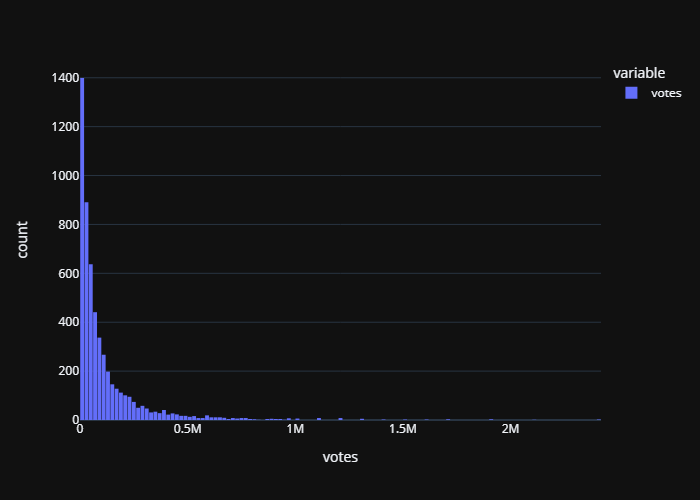

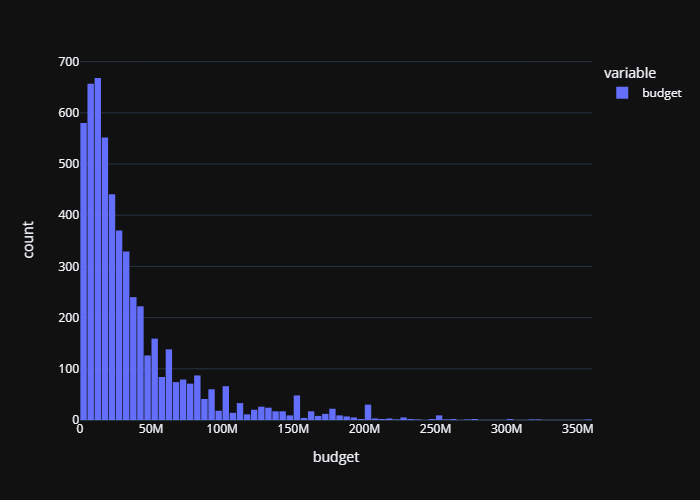

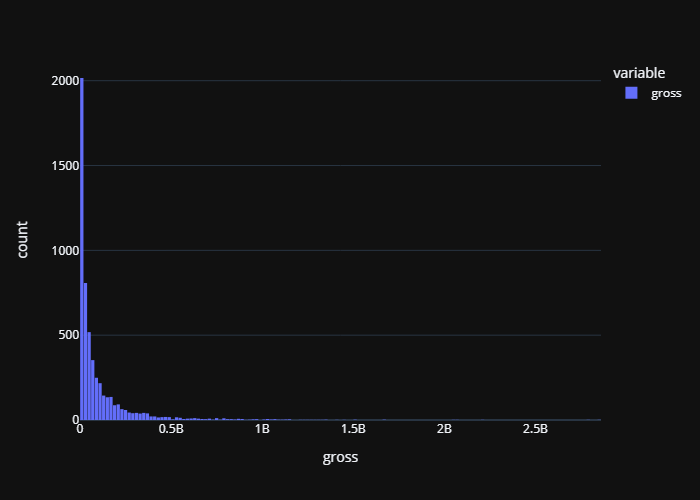

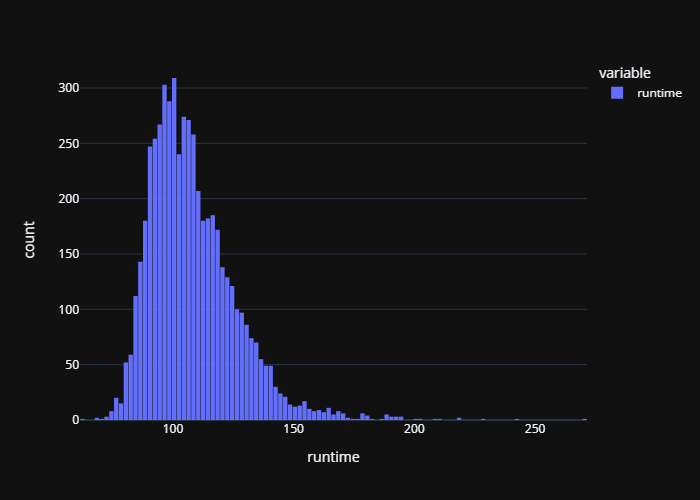

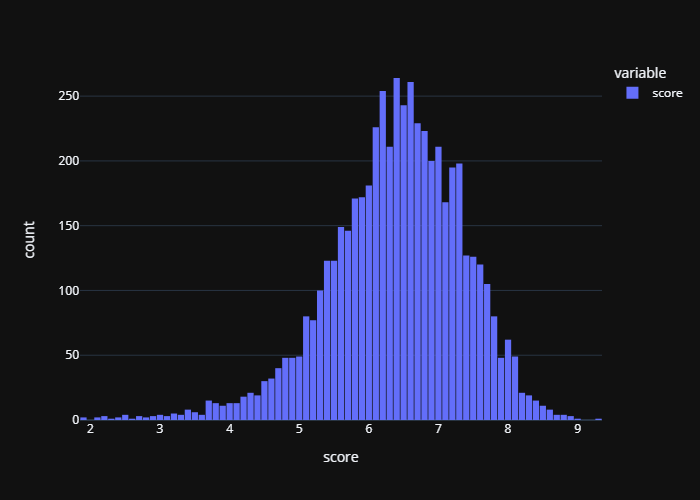

In [9]:
#brief look into how the numeric variables are distributed
bxList=["votes","budget","gross","runtime","score"]
for col in bxList:
    f = px.histogram(baseDF[col], 
                    template = "plotly_dark",
                    labels={"value" : col}
                    )
    f.update_layout(bargap=0.1)
    #iplot(f)
    f.show("png")

In [10]:
#Base Categorization of "Rating"
baseDF["rating"].value_counts()

rating
R            2597
PG-13        1730
PG            909
G             111
Not Rated      44
Unrated        17
NC-17          12
TV-MA           2
Approved        1
X               1
Name: count, dtype: int64

TV-14 is PG-13 but for 14 y/o

TV-MA = R = X = NC-17

TV-PG = PG

Not Rated = unrated

In [11]:
#Mapping of rating
ratingList=baseDF["rating"].unique().tolist()
ratingDict = {}
for rating in ratingList:
    ratingDict[rating]=rating

ratingDict["TV-14"]="PG-13"
ratingDict["TV-MA"]="NC-17"
ratingDict["R"]="NC-17"
ratingDict["X"]="NC-17"
ratingDict["TV-PG"] = "PG"
ratingDict["Not Rated"] = "Unrated"
ratingDict["Approved"] = "NC-17" 

In [12]:
ratingDict

{'R': 'NC-17',
 'PG': 'PG',
 'G': 'G',
 'NC-17': 'NC-17',
 'Approved': 'NC-17',
 'Not Rated': 'Unrated',
 'PG-13': 'PG-13',
 nan: nan,
 'Unrated': 'Unrated',
 'X': 'NC-17',
 'TV-MA': 'NC-17',
 'TV-14': 'PG-13',
 'TV-PG': 'PG'}

In [13]:
#Remapping of Dict to Rating
baseDF["rating"] = baseDF["rating"].map(ratingDict)

In [14]:
baseDF["rating"].unique()

array(['NC-17', 'PG', 'G', 'Unrated', 'PG-13', nan], dtype=object)

Recategorization of "rating" for easier analysis.

In [66]:
baseDF["rating"].value_counts()

rating
NC-17      2566
PG-13      1710
PG          897
G           110
Unrated      59
Name: count, dtype: int64

# Research Question (Problem Definition)
**Is it possible to predict the success of movies based on their characteristics?**

To Start, we will perform EDA to search for trends and perhaps confirm certain assumptions in regards to the correlation of certain variables.

# EDA

## Overall Correlation

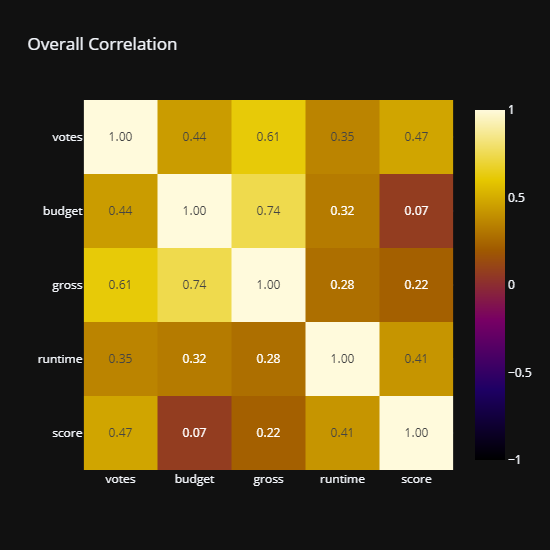

In [16]:
numCorrDF = baseDF[["votes","budget","gross","runtime","score"]]
fig = px.imshow(numCorrDF.corr(), 
                zmin = -1,
                zmax = 1,
                text_auto="0.2f", 
                height=550,
                width=550,
                template="plotly_dark", 
                title="Overall Correlation", 
                color_continuous_scale = "electric") 
#iplot(fig)
fig.show("png")

Strong correlation observed between votes and budget on gross.

The key finding which is perhaps unexpected could be the correlation between score and gross. One would think a highly scored movie should be earning more, but "0.22" indicates otherwise. This could be due to the different level of success relating to movies across all scores, where movies can score low and have a high gross and vice versa.

## Rating vs. Score

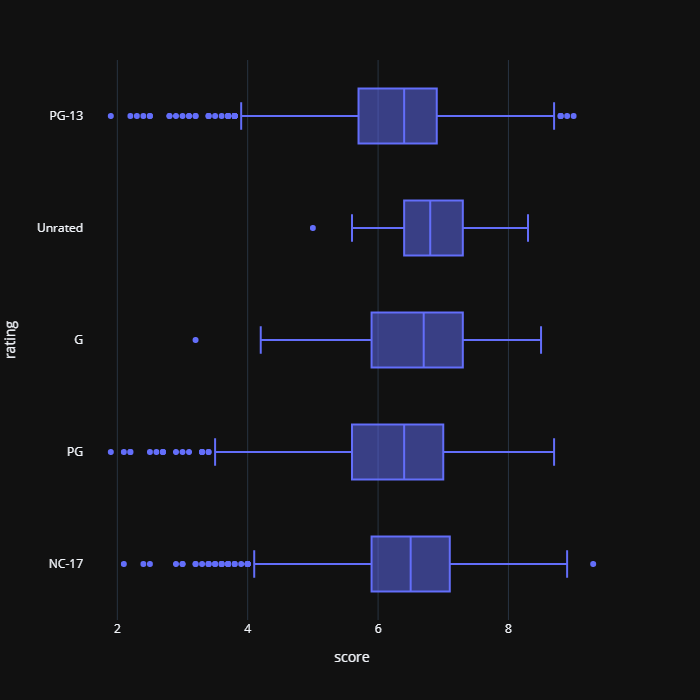

In [17]:
#rating : score boxplot
f = px.box(baseDF, 
           x="score", 
           y="rating",
           height=700,
           template="plotly_dark")

#iplot(f)
f.show("png")

The rating:score boxplot shows that the range of rating for movies are quite close, a point of note could be the "Unrated" rating having a tighter and higher average score as indicated by the median and whiskers.

**Generally, this can mean the rating of a movie can play a part to the movie's score, but it is not significant.**

## Genre vs. Score

In [18]:
baseDF["genre"].value_counts()

genre
Comedy       1496
Action       1417
Drama         869
Crime         400
Adventure     327
Biography     312
Animation     278
Horror        254
Fantasy        42
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: count, dtype: int64

In [19]:
#remove genres with low counts to get a better analysis of relevant genres
#values pertaining to baseDF before this will need to be ran again to reflect updated values

baseDF = baseDF.loc[(baseDF["genre"]=="Comedy") | (baseDF["genre"]=="Action") | (baseDF["genre"]=="Drama")
                   | (baseDF["genre"]=="Crime") | (baseDF["genre"]=="Biography") | (baseDF["genre"]=="Adventure")
                   | (baseDF["genre"]=="Animation") | (baseDF["genre"]=="Horror")]
baseDF["genre"].value_counts()

genre
Comedy       1496
Action       1417
Drama         869
Crime         400
Adventure     327
Biography     312
Animation     278
Horror        254
Name: count, dtype: int64

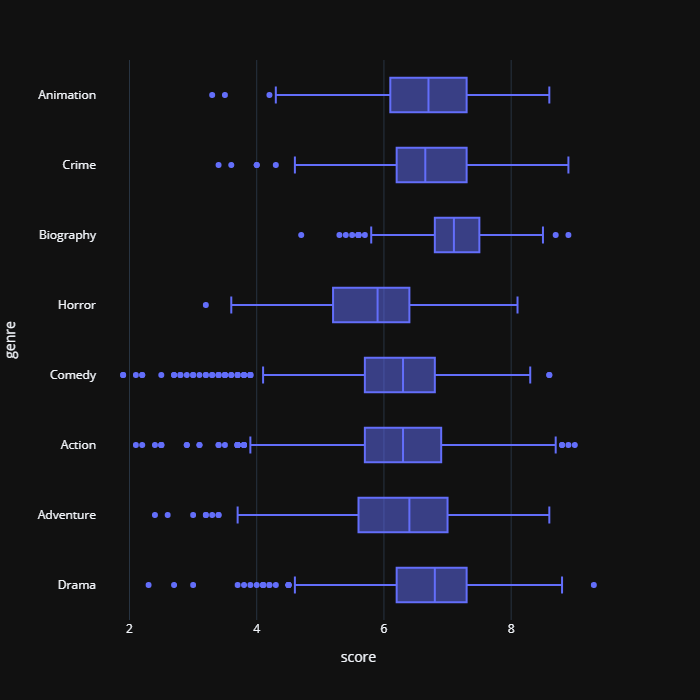

In [20]:
#genre : score boxplot
f = px.box(baseDF, 
           x="score", 
           y="genre",
           height=700,
           template="plotly_dark")
#iplot(f)
f.show("png")

The score:genre boxplot shows that certain genres are more well received by the audience than the others. The "Biography" genre indicates more than 75% of its movies are above 6.5, which is a very good score when compared to the other genre's boxplot. 

The Drama, Crime and Animation genre also seem to do better compared to other genres without "Biography".

This boxplot also shows that "horror" as a main genre is the hardest to receive a good rating compared to other genres.

**This can mean "Drama","Animation" and "Biography" are the best main genres to produce a movie that is scored well**

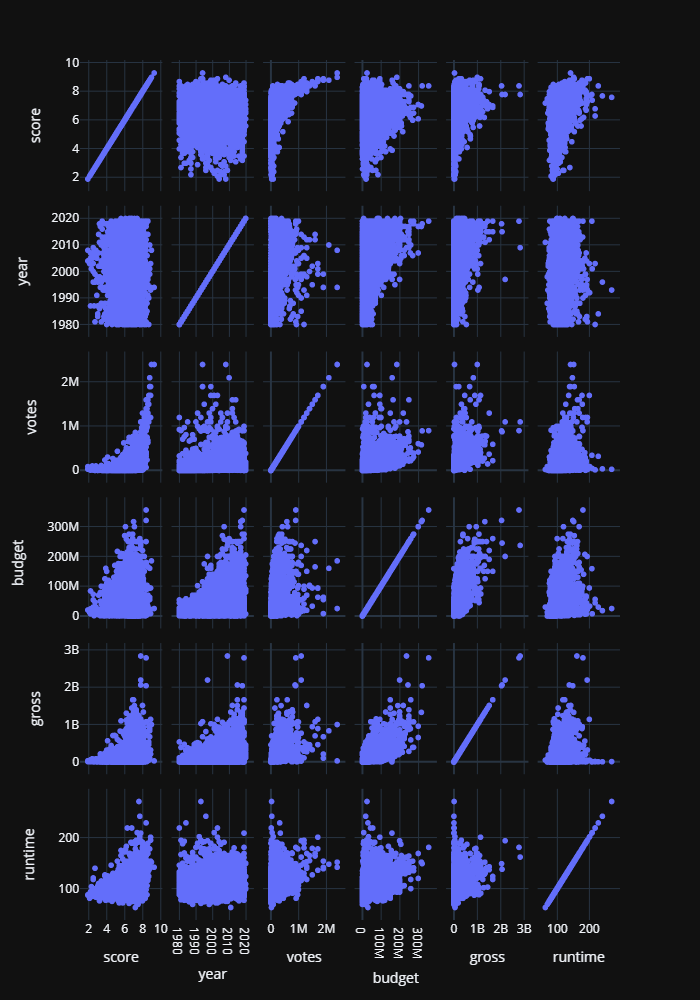

In [22]:
#Pairplot of numeric variables
scoreList=["score","year","votes","budget","gross","runtime"]
pd.DataFrame.iteritems = pd.DataFrame.items
f = px.scatter_matrix(baseDF,dimensions=["score", 'year', 'votes', 'budget', "gross", "runtime"], height=1000, template="plotly_dark")
#iplot(f)
f.show("png")

From the scatter-plots of the numerical variables, multiple trends can be observed.

**1. High vote count contributes heavily to the high score obtained by movies, as seen from the curve formed on the score-votes on the scatterplot => popularity of film matters for a maintained good score**

**2. From the trend in budget-score, it is more likely for a movie to score better with a higher budget. => budget matters, but low budget movies can also score well**

**3. From the year scatterplots, there is a noticeable increasing trend for budget and gross over the years. With the scale used for gross and budget being 1e9 and 1e8 respectively, the increased budget is worth it for the increased gross if it means the movie can do well. While not as much budget and gross, the year-votes also shows an increasing trend, indicating "newer" movies are more voted. This increase is probably due to the recency of movies and how widespread movies are worldwide relative to the time before and after the release of IMDb. => showcases correlation of year to other variables**

**4. From the score scatterplots, trends can be observed as well across all variables except year. But the trends might not indicate much correlation compared to other variables due to how score could be more dependent on other variables (included or not included in this dataset) that perharps affect score more. Nonetheless, it still can contribute to the success of a film, just that score might not be as weighted.**

## Defining Success

We will say the movie is a success if the gross amount is 1.5 times the budget.

In [23]:
succCOL = pd.DataFrame((baseDF["gross"]-baseDF["budget"]*1.5)>0)
baseDF["Success"] = succCOL

In [24]:
baseDF[["gross","budget","Success"]].head(20)

,gross,budget,Success
0,46998772.0,19000000.0,True
1,58853106.0,4500000.0,True
2,538375067.0,18000000.0,True
3,83453539.0,3500000.0,True
4,39846344.0,6000000.0,True
5,39754601.0,550000.0,True
6,115229890.0,27000000.0,True
7,23402427.0,18000000.0,False
8,108185706.0,54000000.0,True
9,15795189.0,10000000.0,True


In [25]:
baseDF["Success"].value_counts()

Success
True     3021
False    2332
Name: count, dtype: int64

#### 56.4% of movies are Successful

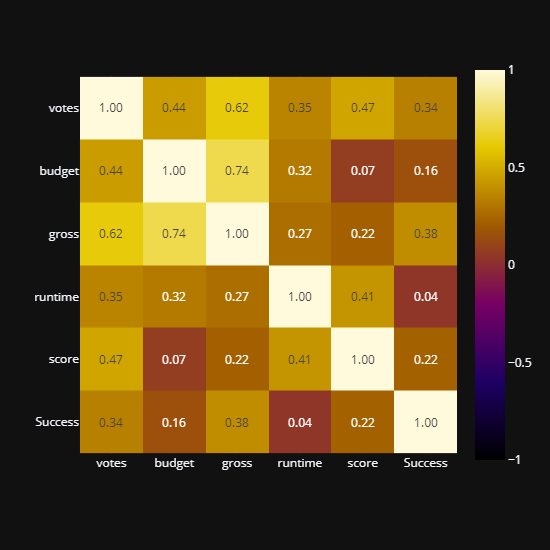

In [26]:
numCorrDF = baseDF[["votes","budget","gross","runtime","score","Success"]]
f = px.imshow(numCorrDF.corr(), 
                zmin = -1,
                zmax = 1,
                text_auto="0.2f", 
                height=550,
                width=550,
                template="plotly_dark", 
                color_continuous_scale = "electric") 
#iplot(f)
f.show("png")

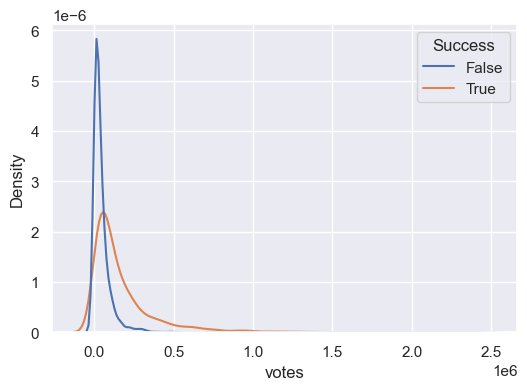

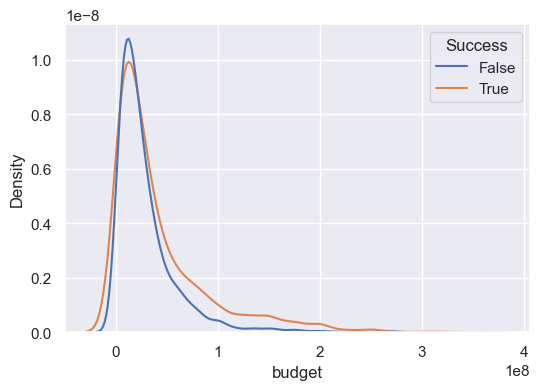

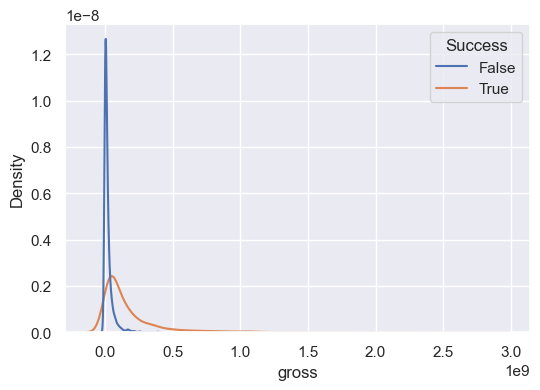

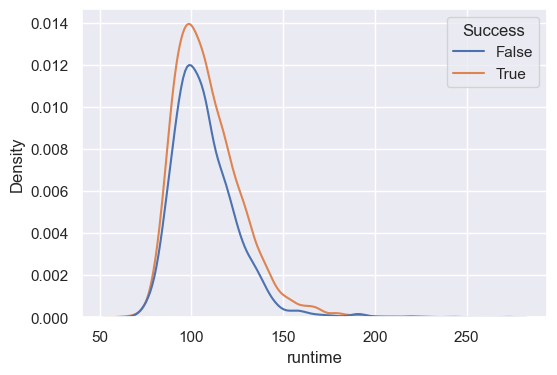

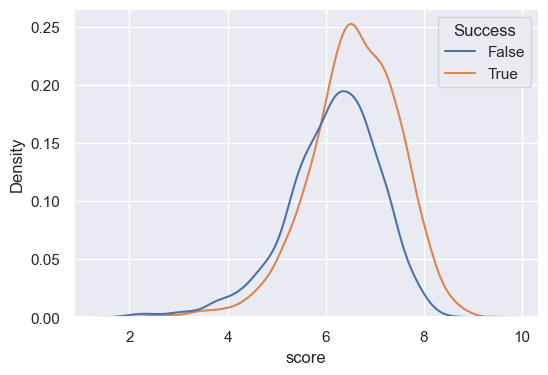

In [27]:
varList=["votes","budget","gross","runtime","score"]
for var in varList:
    f = plt.figure(figsize=(6, 4))
    sb.kdeplot(baseDF, x=var, hue='Success')

**There is not much direct correlation between success and other numerical variables and that is to be expected given the success/failure of movies in the movie industry. We can perhaps look at the writer, director and star variable and see if certain figures are creating more successful movies in the industry. Another area to look at after could be the highest grossing movies in relation to the previous three variable.**

## Writers vs. Success

In [28]:
baseDF["writer"].value_counts().head(20)

writer
Woody Allen             32
Stephen King            24
John Hughes             20
Luc Besson              14
Joel Coen               13
Robert Rodriguez        11
Quentin Tarantino       11
David Mamet             11
M. Night Shyamalan      11
Kevin Smith             10
Leigh Whannell          10
Michael Crichton        10
Ehren Kruger            10
John Grisham             9
William Shakespeare      9
Gene Roddenberry         9
Brian Helgeland          9
Fran Walsh               8
Wes Craven               8
Paul Thomas Anderson     8
Name: count, dtype: int64

In [29]:
writerList=baseDF["writer"].value_counts().index.tolist()
writerListF=writerList[0:20] # top 20 writer by count for movies
writerDF=baseDF[(baseDF["writer"].isin(writerListF))]

In [30]:
writerDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 7646
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      247 non-null    object 
 1   rating    247 non-null    object 
 2   genre     247 non-null    object 
 3   year      247 non-null    int64  
 4   released  247 non-null    object 
 5   score     247 non-null    float64
 6   votes     247 non-null    float64
 7   director  247 non-null    object 
 8   writer    247 non-null    object 
 9   star      247 non-null    object 
 10  country   247 non-null    object 
 11  budget    247 non-null    float64
 12  gross     247 non-null    float64
 13  company   247 non-null    object 
 14  runtime   247 non-null    float64
 15  Success   247 non-null    bool   
dtypes: bool(1), float64(5), int64(1), object(9)
memory usage: 31.1+ KB


In [31]:
writerDF["Success"].value_counts()

Success
True     155
False     92
Name: count, dtype: int64

**62.75% of movies under the top 20 writer by counts are successful**

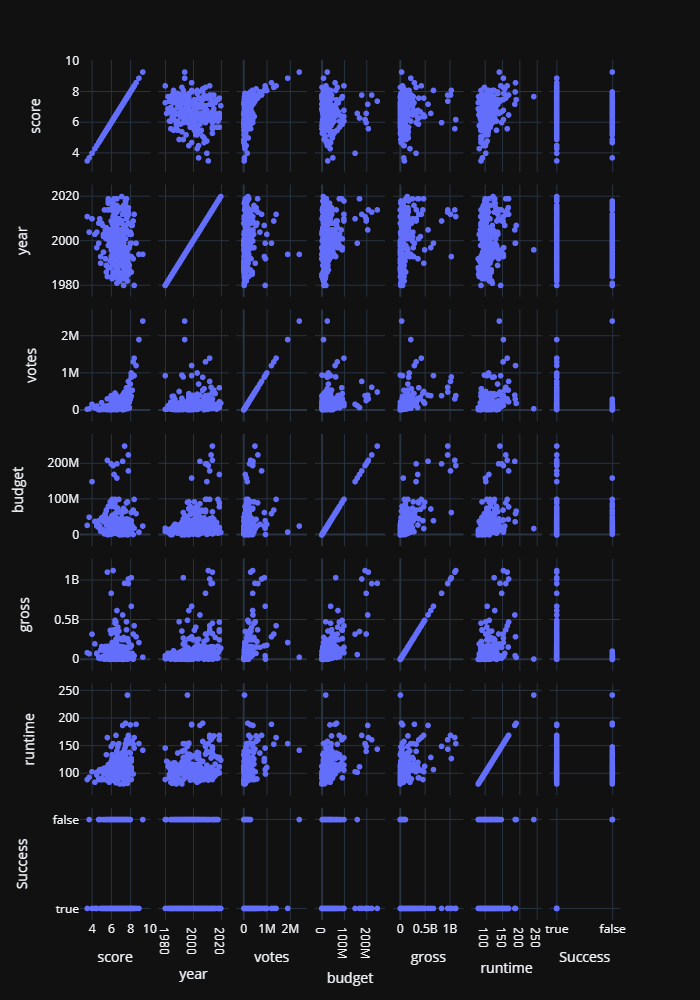

In [32]:
#Pairplot of top 20 writers
writerList=["score","year","votes","budget","gross","runtime", "Success"]
f = px.scatter_matrix(writerDF[writerList], 
                      height=1000,
                      template="plotly_dark")
#iplot(f)
f.show("png")

There is a surprising contrast on the year-budget and year-gross on the writerDF when compared to the baseDF. Where there is not really a increasing trend for either budget or gross over the years. By the success defined in this analysis, the success achieved by these writers are likely just financial success with a fixed level of popularity as can be seen by most of the gross points on the year-gross scatterplot being under 0.2.

## Writer vs. Score

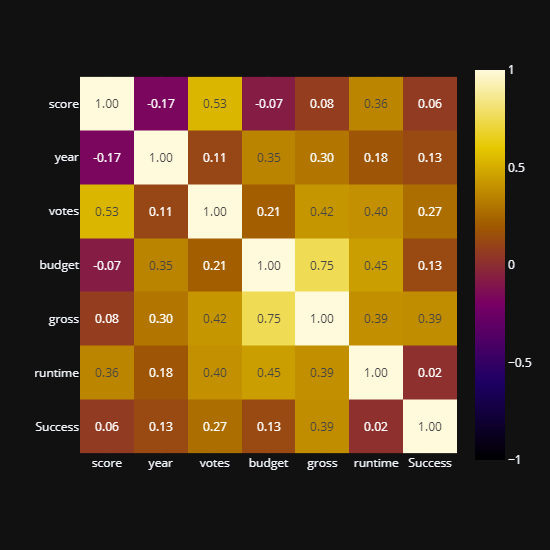

In [33]:
f = px.imshow(writerDF[writerList].corr(), 
                zmin = -1,
                zmax = 1,
                text_auto="0.2f", 
                height=550,
                width=550,
                template="plotly_dark", 
                color_continuous_scale = "electric") 

#iplot(f)
f.show("png")

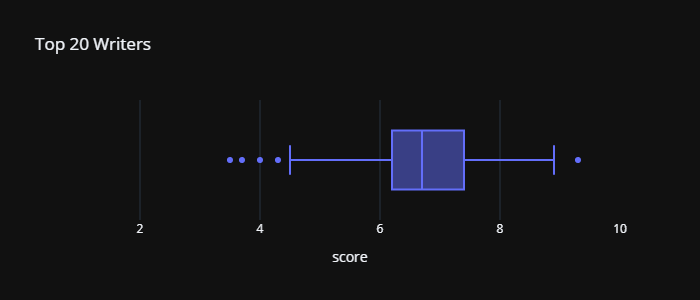

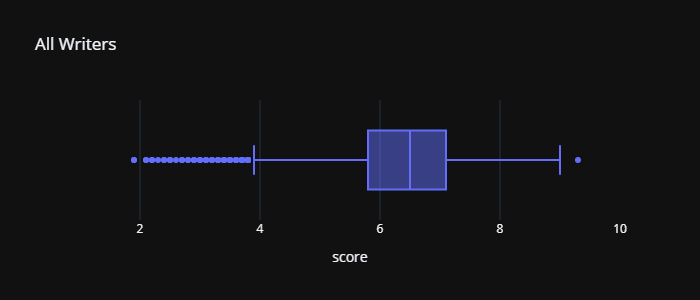

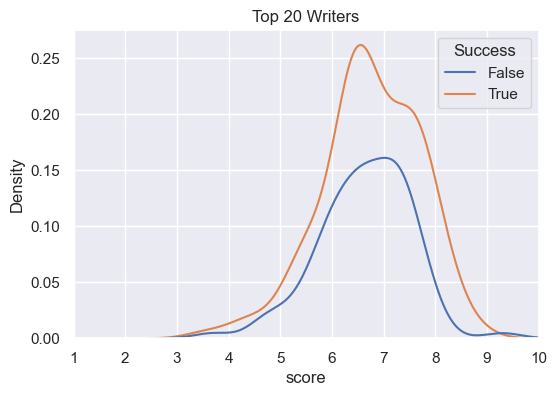

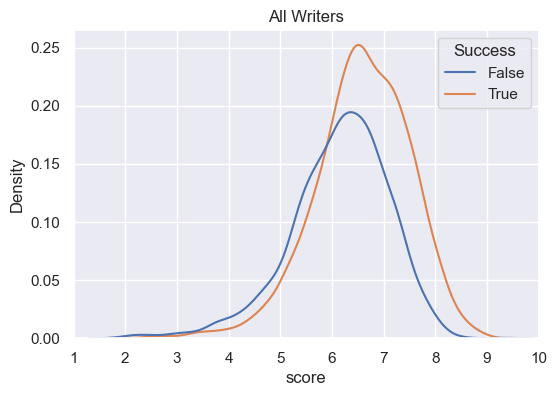

In [34]:
#Comparison of top 20 writers against all writers in score

f = px.box(writerDF, 
           x="score", 
           height=300,
           title="Top 20 Writers",
           template="plotly_dark")
f.update_xaxes(range=[1,10])

#iplot(f)
f.show("png")

f = px.box(baseDF, 
           x="score", 
           height=300,
           title="All Writers",
           template="plotly_dark")
f.update_xaxes(range=[1,10])

#iplot(f)
f.show("png")

f = plt.figure(figsize=(6, 4))
f = sb.kdeplot(writerDF,x='score',hue='Success')
plt.title("Top 20 Writers")
f.set_xlim(1,10)

f = plt.figure(figsize=(6, 4))
f = sb.kdeplot(baseDF,x='score',hue='Success')
plt.title("All Writers")
f.set_xlim(1,10)

print()

**A head to head comparison between the boxplots and kdeplots would indicate movies with the selected writers will score better compared to the general dataset and is related to the quantified success, likely hinting at the experience of writers playing a part in the success from a score point of view.**

## Director vs. Success

In [35]:
baseDF["director"].value_counts().head(20)

director
Woody Allen          33
Clint Eastwood       31
Steven Spielberg     26
Ridley Scott         23
Steven Soderbergh    23
Ron Howard           22
Joel Schumacher      20
Martin Scorsese      18
Tim Burton           18
Barry Levinson       18
Oliver Stone         17
Robert Zemeckis      17
Spike Lee            17
Brian De Palma       17
Directors            16
Garry Marshall       15
Renny Harlin         15
Tony Scott           15
Walter Hill          15
Rob Reiner           15
Name: count, dtype: int64

In [36]:
dirList=baseDF["director"].value_counts().index.tolist()
dirListF=dirList[0:20] # top 20 directors by count for movies
dirDF=baseDF[(baseDF["director"].isin(dirListF))]

In [37]:
dirDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 7 to 7533
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      391 non-null    object 
 1   rating    391 non-null    object 
 2   genre     391 non-null    object 
 3   year      391 non-null    int64  
 4   released  391 non-null    object 
 5   score     391 non-null    float64
 6   votes     391 non-null    float64
 7   director  391 non-null    object 
 8   writer    391 non-null    object 
 9   star      391 non-null    object 
 10  country   391 non-null    object 
 11  budget    391 non-null    float64
 12  gross     391 non-null    float64
 13  company   391 non-null    object 
 14  runtime   391 non-null    float64
 15  Success   391 non-null    bool   
dtypes: bool(1), float64(5), int64(1), object(9)
memory usage: 49.3+ KB


In [38]:
dirDF["Success"].value_counts()

Success
True     230
False    161
Name: count, dtype: int64

**58.8% of movies under the top 20 director by counts are successful**

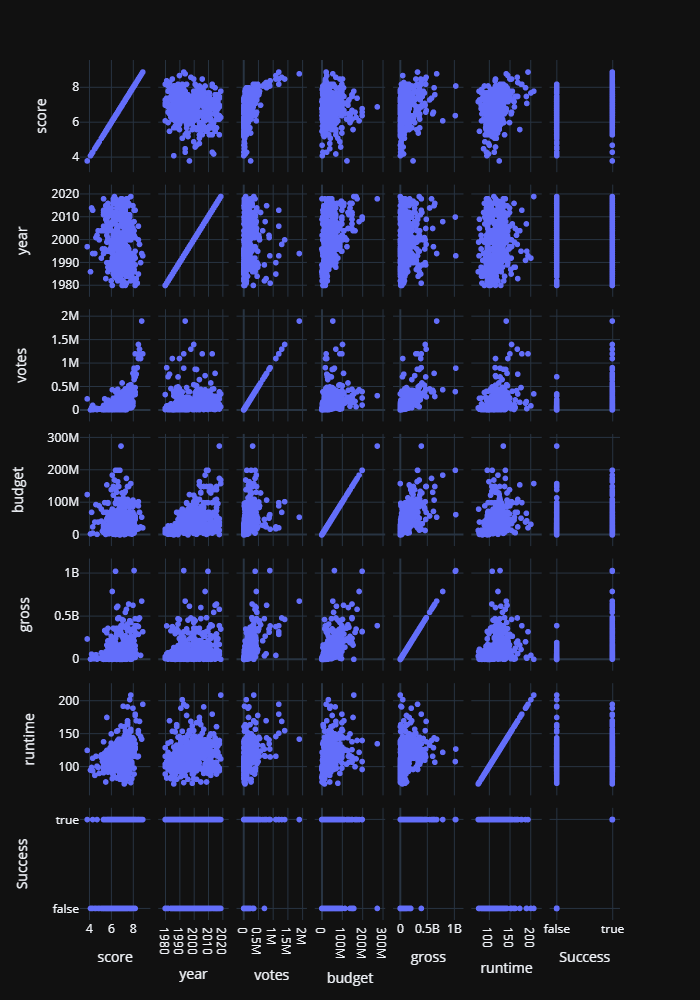

In [39]:
#Pairplot of top 20 directors
dirList=["score","year","votes","budget","gross","runtime","Success"]
f = px.scatter_matrix(dirDF[dirList], 
                      height=1000,
                      template="plotly_dark")

#iplot(f)
f.show("png")

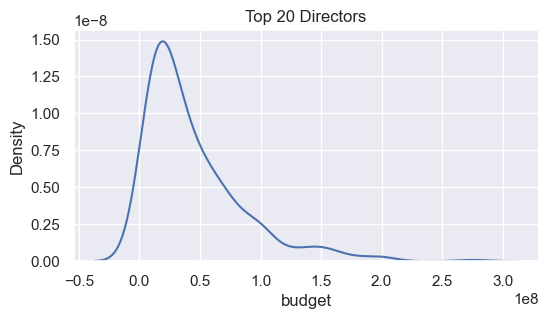

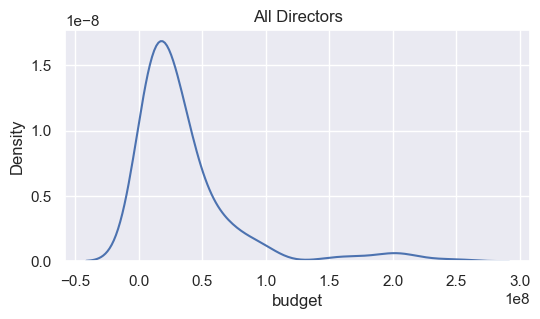

In [40]:
f = plt.figure(figsize=(6, 3))
sb.kdeplot(dirDF["budget"])
plt.title("Top 20 Directors")
f = plt.figure(figsize=(6, 3))
sb.kdeplot(writerDF["budget"])
plt.title("All Directors")
print()

Budget can be observed to be more varied across the year when compared to the writerDF.

There is a noticeable change in saturation for budget-gross when compared writerDF's budget-gross=> Writer might not influence the budget that goes into their movie

## Director vs. Score

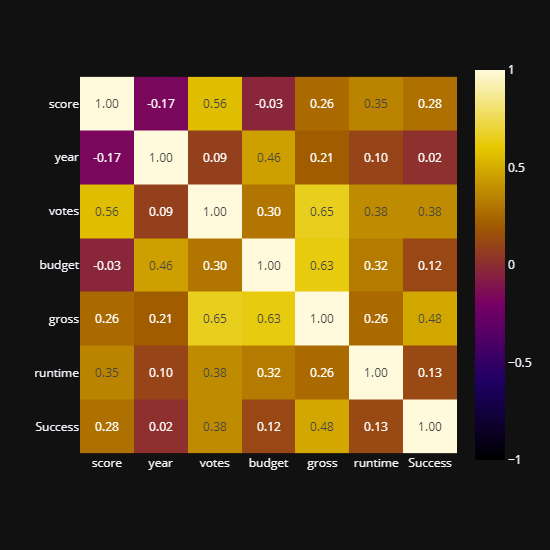

In [41]:
f = px.imshow(dirDF[dirList].corr(), 
                zmin = -1,
                zmax = 1,
                text_auto="0.2f", 
                height=550,
                width=550,
                template="plotly_dark", 
                color_continuous_scale = "electric") 
#iplot(f)
f.show("png")

In [42]:
dirDF['score'].head(20)

7      8.2
9      7.0
14     7.1
50     7.3
53     6.1
92     8.4
98     7.4
117    7.3
206    8.1
215    6.9
224    7.8
233    6.0
241    7.1
274    6.6
331    8.3
355    6.5
359    6.6
424    5.5
481    7.5
482    6.8
Name: score, dtype: float64

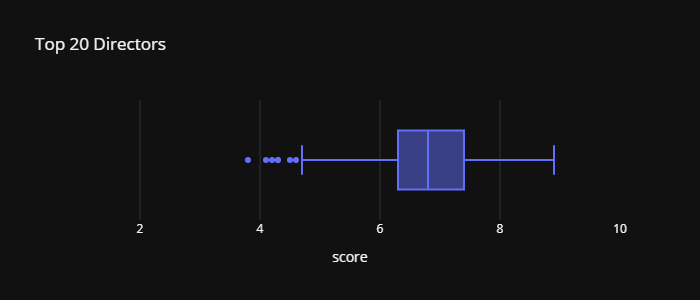

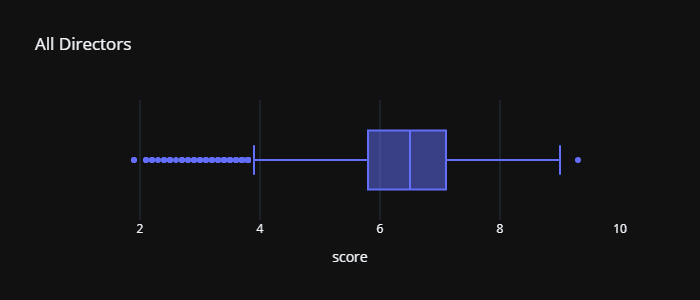

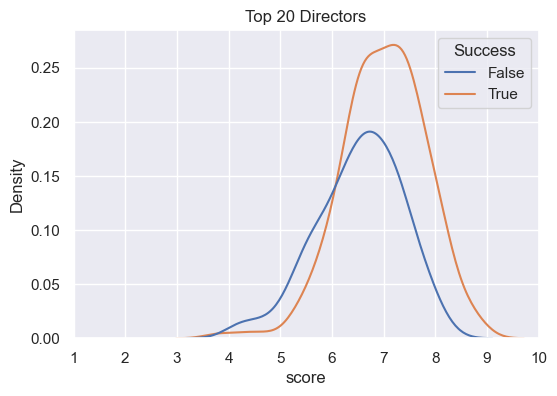

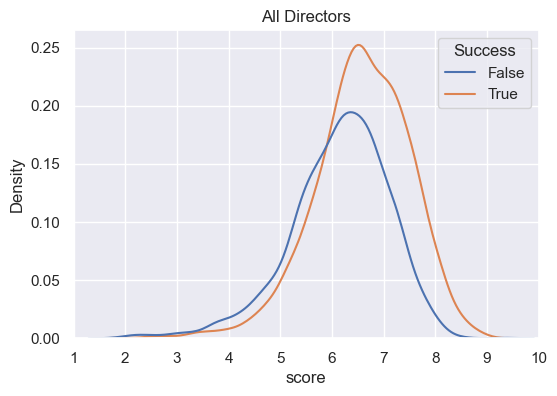

In [43]:
#Comparison of top 20 directors against all writers in score
f = px.box(dirDF, 
           x="score", 
           height=300,
           title="Top 20 Directors",
           template="plotly_dark")
f.update_xaxes(range=[1,10])
#iplot(f)
f.show("png")

f = px.box(baseDF, 
           x="score", 
           height=300,
           title="All Directors",
           template="plotly_dark")
f.update_xaxes(range=[1,10])
#iplot(f)
f.show("png")

f = plt.figure(figsize=(6, 4))
f = sb.kdeplot(dirDF,x='score',hue='Success')
plt.title("Top 20 Directors")
f.set_xlim(1,10)

f = plt.figure(figsize=(6, 4))
f = sb.kdeplot(baseDF,x='score',hue='Success')
plt.title("All Directors")
f.set_xlim(1,10)

print()

The findings when compared to the baseDF are similar to when writerDF is compared to baseDF. The noticeable difference being there are more movies which ended up being not successful. 

## Star vs. Success

In [44]:
baseDF["star"].value_counts().head(20)

star
Nicolas Cage             40
Robert De Niro           38
Tom Hanks                37
Tom Cruise               33
Denzel Washington        33
Sylvester Stallone       32
Bruce Willis             32
Johnny Depp              29
Adam Sandler             28
Kevin Costner            27
Eddie Murphy             27
Keanu Reeves             26
Arnold Schwarzenegger    26
Matthew McConaughey      25
Mel Gibson               25
John Travolta            25
Harrison Ford            25
Brad Pitt                24
Robin Williams           24
Mark Wahlberg            24
Name: count, dtype: int64

In [45]:
starList=baseDF["star"].value_counts().index.tolist()
starListF=starList[0:20] # top 20 star by count for movies
starDF=baseDF[(baseDF["star"].isin(starListF))]

In [46]:
starDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 7 to 7651
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      580 non-null    object 
 1   rating    579 non-null    object 
 2   genre     580 non-null    object 
 3   year      580 non-null    int64  
 4   released  580 non-null    object 
 5   score     580 non-null    float64
 6   votes     580 non-null    float64
 7   director  580 non-null    object 
 8   writer    580 non-null    object 
 9   star      580 non-null    object 
 10  country   580 non-null    object 
 11  budget    580 non-null    float64
 12  gross     580 non-null    float64
 13  company   580 non-null    object 
 14  runtime   580 non-null    float64
 15  Success   580 non-null    bool   
dtypes: bool(1), float64(5), int64(1), object(9)
memory usage: 73.1+ KB


In [47]:
starDF["Success"].value_counts()

Success
True     368
False    212
Name: count, dtype: int64

**63.4% of movies under the top 20 star by counts are successful. The highest percentage among the three single-figure variable so far.**

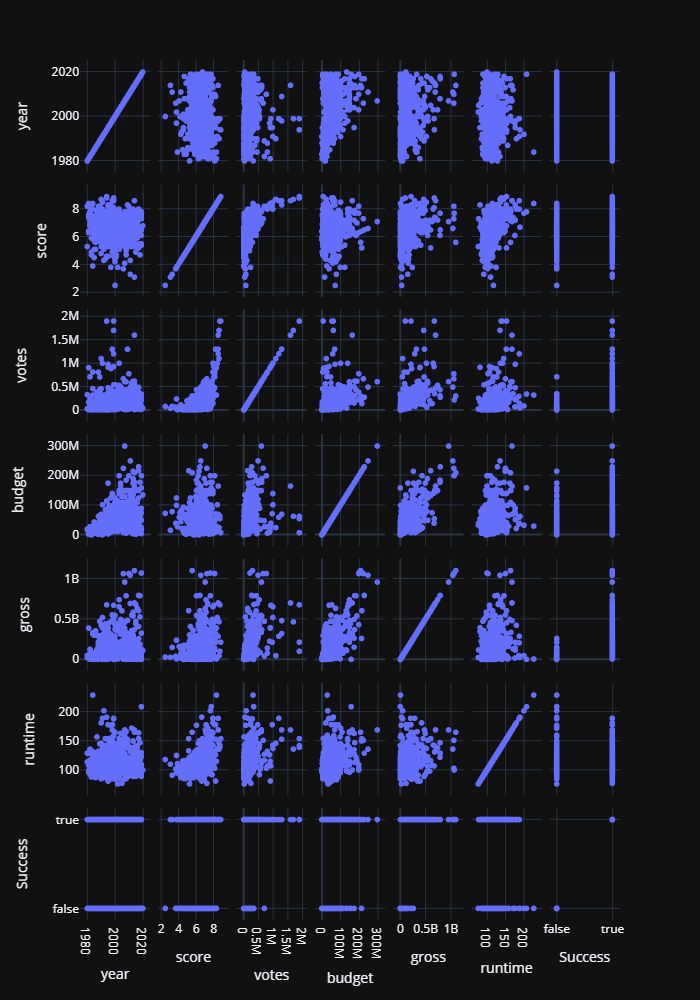

In [48]:
#Pairplot of top 20 stars
f = px.scatter_matrix(starDF[["year", "score", "votes", "budget", "gross", "runtime", "Success"]], 
                      height=1000,
                      template="plotly_dark")
#iplot(f)
f.show("png")

<Axes: xlabel='gross', ylabel='Density'>

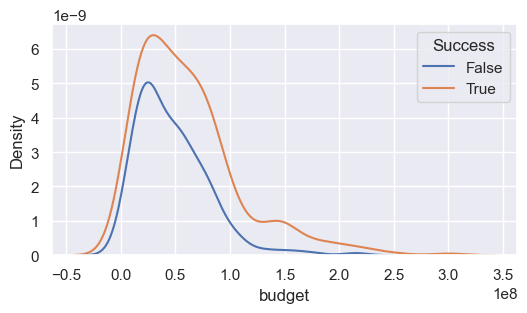

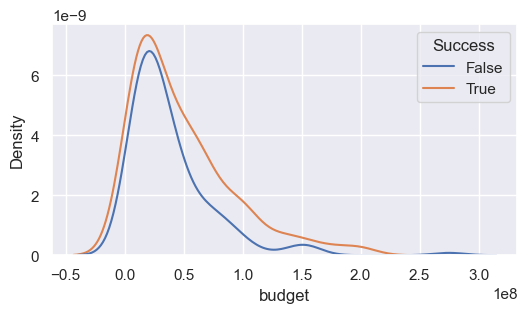

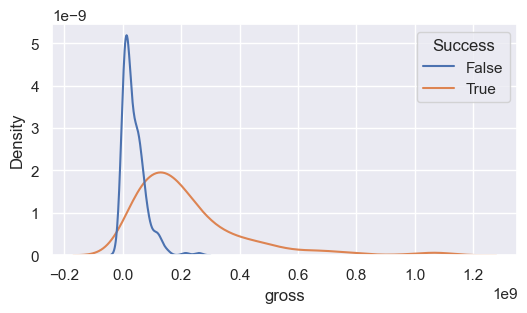

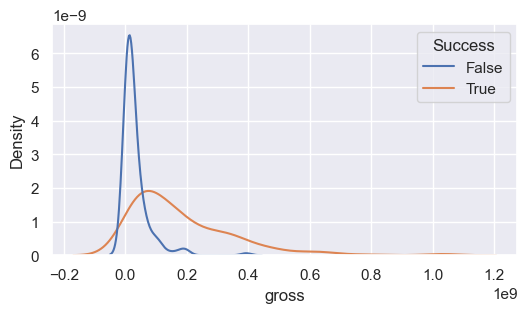

In [49]:
f = plt.figure(figsize=(6, 3))
sb.kdeplot(starDF,x='budget',hue='Success')
f = plt.figure(figsize=(6, 3))
sb.kdeplot(dirDF,x='budget',hue='Success')

f = plt.figure(figsize=(6, 3))
sb.kdeplot(starDF,x='gross',hue="Success")
f = plt.figure(figsize=(6, 3))
sb.kdeplot(dirDF,x='gross',hue="Success")

The visible difference in the budget and gross variable between starDF and dirDF is huge as can be seen from the kdeplot. The additional budget of movies with these actors contribute to the increased success of the movie.  
Gross look similar, but there is a visible increase in the density for starDF at 0.2 of gross, indicating gross to be more for movies with the selected stars. The lower density of gross in starDF for the (not)Success movies also indicates a higher density of success, making movies under starDF better than dirDF overall by gross. 

Main stars costing more due to their popularity (hence subsequent recast).

## Star vs. Score

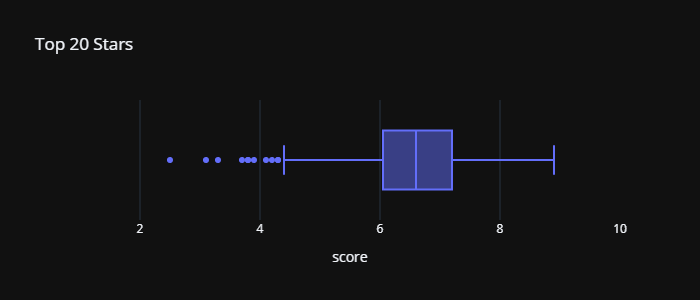

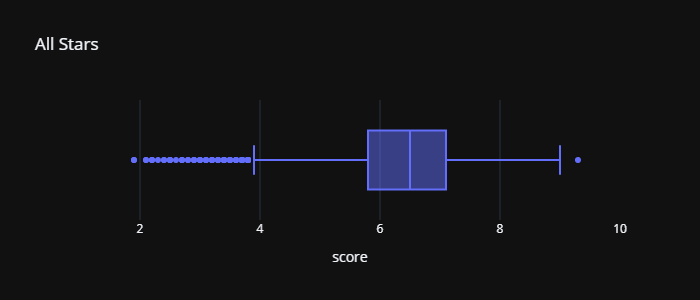

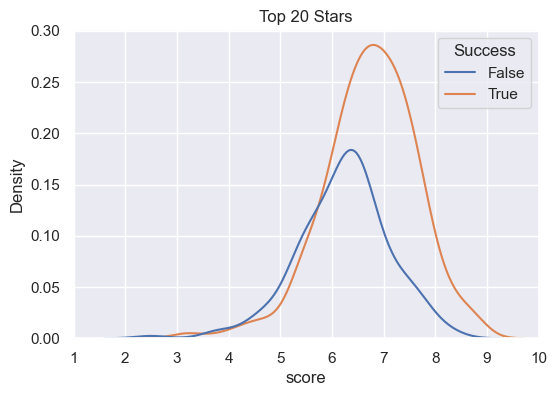

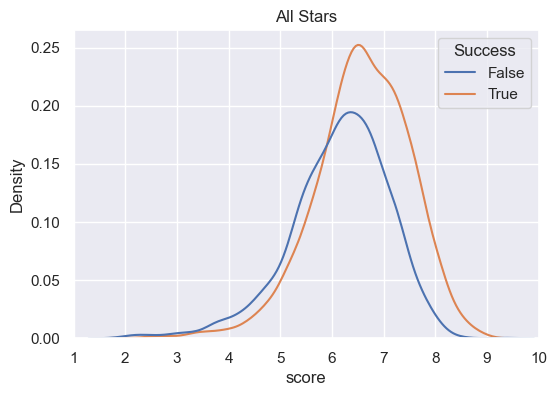

In [50]:
#Comparison of top 20 stars against all writers in score
f = px.box(starDF, 
           x="score", 
           height=300,
           title="Top 20 Stars",
           template="plotly_dark")
f.update_xaxes(range=[1,10])
#iplot(f)
f.show("png")

f = px.box(baseDF, 
           x="score", 
           height=300,
           title="All Stars",
           template="plotly_dark")
f.update_xaxes(range=[1,10])
#iplot(f)
f.show("png")

f = plt.figure(figsize=(6, 4))
f = sb.kdeplot(starDF,x='score',hue='Success')
plt.title("Top 20 Stars")
f.set_xlim(1,10)

f = plt.figure(figsize=(6, 4))
f = sb.kdeplot(baseDF,x='score',hue='Success')
plt.title("All Stars")
f.set_xlim(1,10)

print()

The boxplot indicates a lower score across this set of movies when compared to the dirDF.

While the movies with these selected stars are more likely to succeed, the score seems to be generally worse compared to the movies with the selected directors. -> Stars plays a more important role to success than director, but director plays a more important role to score

**Precedence to movie success -> star > writer > director (Surprising because content comes from writer and execution is by director and star)**

## Top writer,director and star in relation to the top 1000 successful movie 
(filtered to successful, then order by gross)

In [51]:
succDF = baseDF[baseDF['Success']==True]
topDF = succDF.sort_values(by=['gross'],ascending=False).head(1000)

In [52]:
topDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 5445 to 5894
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1000 non-null   object 
 1   rating    999 non-null    object 
 2   genre     1000 non-null   object 
 3   year      1000 non-null   int64  
 4   released  1000 non-null   object 
 5   score     1000 non-null   float64
 6   votes     1000 non-null   float64
 7   director  1000 non-null   object 
 8   writer    1000 non-null   object 
 9   star      1000 non-null   object 
 10  country   1000 non-null   object 
 11  budget    1000 non-null   float64
 12  gross     1000 non-null   float64
 13  company   1000 non-null   object 
 14  runtime   1000 non-null   float64
 15  Success   1000 non-null   bool   
dtypes: bool(1), float64(5), int64(1), object(9)
memory usage: 126.0+ KB


In [53]:
#filter of top 20 writers in top 1000 movies
writerTopDF=topDF[(topDF["writer"].isin(writerListF))]
writerTopDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 5878 to 4451
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      53 non-null     object 
 1   rating    53 non-null     object 
 2   genre     53 non-null     object 
 3   year      53 non-null     int64  
 4   released  53 non-null     object 
 5   score     53 non-null     float64
 6   votes     53 non-null     float64
 7   director  53 non-null     object 
 8   writer    53 non-null     object 
 9   star      53 non-null     object 
 10  country   53 non-null     object 
 11  budget    53 non-null     float64
 12  gross     53 non-null     float64
 13  company   53 non-null     object 
 14  runtime   53 non-null     float64
 15  Success   53 non-null     bool   
dtypes: bool(1), float64(5), int64(1), object(9)
memory usage: 6.7+ KB


In [54]:
#filter of top 20 directors in top 1000 movies
dirTopDF=topDF[(topDF["director"].isin(dirListF))]
dirTopDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 2245 to 5070
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      104 non-null    object 
 1   rating    104 non-null    object 
 2   genre     104 non-null    object 
 3   year      104 non-null    int64  
 4   released  104 non-null    object 
 5   score     104 non-null    float64
 6   votes     104 non-null    float64
 7   director  104 non-null    object 
 8   writer    104 non-null    object 
 9   star      104 non-null    object 
 10  country   104 non-null    object 
 11  budget    104 non-null    float64
 12  gross     104 non-null    float64
 13  company   104 non-null    object 
 14  runtime   104 non-null    float64
 15  Success   104 non-null    bool   
dtypes: bool(1), float64(5), int64(1), object(9)
memory usage: 13.1+ KB


In [55]:
#filter of top 20 stars in top 1000 movies
starTopDF=topDF[(topDF["star"].isin(starListF))]
starTopDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 6494 to 5894
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      204 non-null    object 
 1   rating    203 non-null    object 
 2   genre     204 non-null    object 
 3   year      204 non-null    int64  
 4   released  204 non-null    object 
 5   score     204 non-null    float64
 6   votes     204 non-null    float64
 7   director  204 non-null    object 
 8   writer    204 non-null    object 
 9   star      204 non-null    object 
 10  country   204 non-null    object 
 11  budget    204 non-null    float64
 12  gross     204 non-null    float64
 13  company   204 non-null    object 
 14  runtime   204 non-null    float64
 15  Success   204 non-null    bool   
dtypes: bool(1), float64(5), int64(1), object(9)
memory usage: 25.7+ KB


In [56]:
iniWS=writerDF["writer"].value_counts().sum()
topWS=writerTopDF.shape[0]
print("Writer movie count: "+str(iniWS))
print("Top 20 writer movies in top 1000: "+str(topWS))

Writer movie count: 247
Top 20 writer movies in top 1000: 53


In [57]:
iniDS=dirDF["director"].value_counts().sum()
topDS=dirTopDF.shape[0]
print("Director count:"+str(iniDS))
print("Top 20 director movies in top 1000: "+str(topDS))

Director count:391
Top 20 director movies in top 1000: 104


In [58]:
iniSS=starDF["star"].value_counts().sum()
topSS=starTopDF.shape[0]
print("Star count:" +str(iniSS))
print("Top 20 star movies in top 1000: "+str(topSS))

Star count:580
Top 20 star movies in top 1000: 204


In [59]:
print("Top 20 star movies are in "+str(round((topSS/iniSS)*100,2))+"% of the top 1000 movies")
print("Top 20 writer movies are in "+str(round((topWS/iniWS)*100,2))+"% of the top 1000 movies")
print("Top 20 director movies are in "+str(round((topDS/iniDS)*100,2))+"% of the top 1000 movies")

Top 20 star movies are in 35.17% of the top 1000 movies
Top 20 writer movies are in 21.46% of the top 1000 movies
Top 20 director movies are in 26.6% of the top 1000 movies


### The precedence for the top 1000 successful movies become star > director > writer. 
This way of calculating accounts for the difference in the top 20s movies count, making the percentage proportionate.

It is surprising that 35.17% of the top20 stars movies are in the top1000 when compared to the 26.6% of the top20 director movies. This difference indicates stars play a more important role in creating movies which are more successful again.

The writers being the lowest here at 21.46% could mean more experienced writers are more likely to create a financially successful movie as defined, but these movies created might not necessarily go beyond the financially successful state, like in the current top 1000 filter. (Previously, precedence of success in top20s is star > writer > director)

## Company vs. Success

In [60]:
baseDF["company"].value_counts().head(20)

company
Universal Pictures           323
Warner Bros.                 295
Columbia Pictures            295
Paramount Pictures           271
Twentieth Century Fox        209
New Line Cinema              150
Walt Disney Pictures         107
Touchstone Pictures          105
Metro-Goldwyn-Mayer (MGM)     99
Dreamworks Pictures           73
TriStar Pictures              73
Miramax                       65
Fox 2000 Pictures             58
Summit Entertainment          57
Lionsgate                     53
Screen Gems                   53
Dimension Films               49
Fox Searchlight Pictures      48
Orion Pictures                45
Castle Rock Entertainment     45
Name: count, dtype: int64

In [61]:
companyList=baseDF["company"].value_counts().index.tolist()
companyListF=companyList[0:20] # top 20 company by count for movies
companyDF=baseDF[(baseDF["company"].isin(companyListF))]

In [62]:
companyDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2473 entries, 0 to 7650
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      2473 non-null   object 
 1   rating    2472 non-null   object 
 2   genre     2473 non-null   object 
 3   year      2473 non-null   int64  
 4   released  2473 non-null   object 
 5   score     2473 non-null   float64
 6   votes     2473 non-null   float64
 7   director  2473 non-null   object 
 8   writer    2473 non-null   object 
 9   star      2473 non-null   object 
 10  country   2473 non-null   object 
 11  budget    2473 non-null   float64
 12  gross     2473 non-null   float64
 13  company   2473 non-null   object 
 14  runtime   2473 non-null   float64
 15  Success   2473 non-null   bool   
dtypes: bool(1), float64(5), int64(1), object(9)
memory usage: 311.5+ KB


In [63]:
companyDF["Success"].value_counts()

Success
True     1604
False     869
Name: count, dtype: int64

**64.86% of movies under the top 20 company by counts are successful**

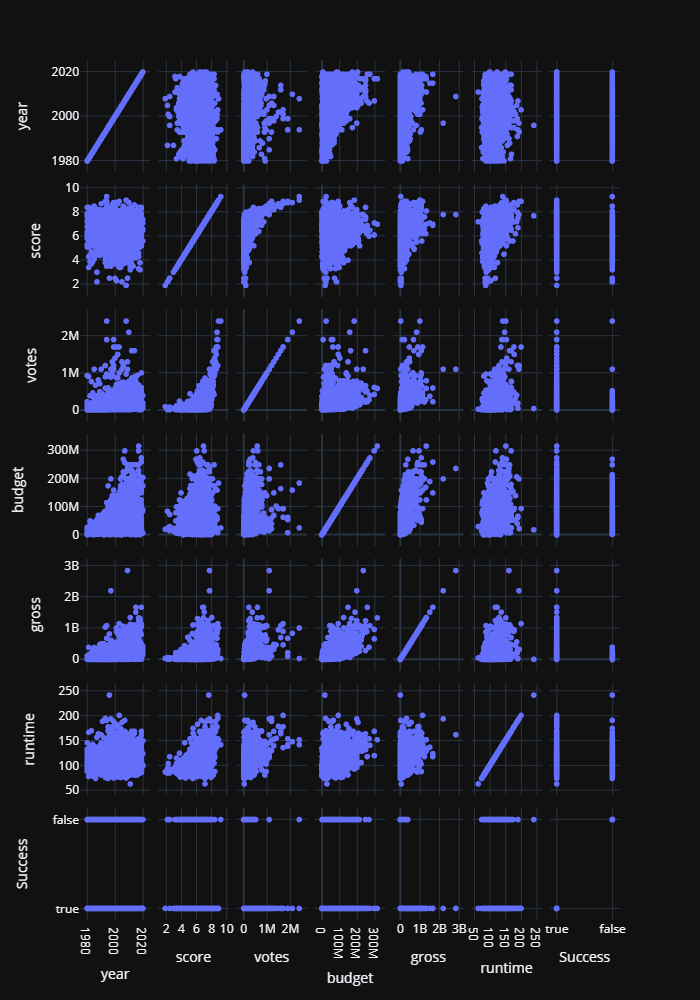

In [64]:
#Pairplot of companies
f = px.scatter_matrix(companyDF[["year", "score", "votes", "budget", "gross", "runtime", "Success"]], 
                      height=1000,
                      template="plotly_dark")
#iplot(f)
f.show("png")

The percentage of success and pairplot of companyDF is similar to starDF. (63.4% vs 64.86%)

This increased percentage does logically make sense even if the number of movies in this dataframe is increased a lot in comparison to the other top 20s. (2473 vs 580 (2nd highest))

There are only a limited amount of companies compared to directors, writers and stars. The companies which is able to produce more movies will know what to do as well to ensure a better chance of success for their movies. Decision to hire directors/writer/star lies with the company, where responsibility of hires can be delegated to writer/directors accordingly.

# EDA Compilation

# Research Question
**Is it possible to predict the success of movies based on their characteristics?**

To Start, we will perform EDA to search for trends and perhaps confirm certain assumptions in regards to the correlation of certain variables.

## Overall Correlation

Strong correlation observed between votes and budget on gross.

The key finding which is perhaps unexpected could be the correlation between score and gross. One would think a highly scored movie should be earning more, but "0.22" indicates otherwise. This could be due to the different level of success relating to movies across all scores, where movies can score low and have a high gross and vice versa.

## Rating vs. Score

The rating:score boxplot shows that the range of rating for movies are quite close, a point of note could be the "Unrated" rating having a tighter and higher average score as indicated by the median and whiskers.

**Generally, this can mean the rating of a movie can play a part to the movie's score, but it is not significant.**

## Genre vs. Score

The score:genre boxplot shows that certain genres are more well received by the audience than the others. The "Biography" genre indicates more than 75% of its movies are above 6.5, which is a very good score when compared to the other genre's boxplot. 

The Drama, Crime and Animation genre also seem to do better compared to other genres without "Biography".

This boxplot also shows that "horror" as a main genre is the hardest to receive a good rating compared to other genres.

**This can mean "Drama","Animation" and "Biography" are the best main genres to produce a movie that is scored well**

## General Pairplot

**1. High vote count contributes heavily to the high score obtained by movies, as seen from the curve formed on the score-votes on the scatterplot => popularity of film matters for a maintained good score**

**2. From the trend in budget-score, it is more likely for a movie to score better with a higher budget. => budget matters, but low budget movies can also score well**

**3. From the year scatterplots, there is a noticeable increasing trend for budget and gross over the years. With the scale used for gross and budget being 1e9 and 1e8 respectively, the increased budget is worth it for the increased gross if it means the movie can do well. While not as much budget and gross, the year-votes also shows an increasing trend, indicating "newer" movies are more voted. This increase is probably due to the recency of movies and how widespread movies are worldwide relative to the time before and after the release of IMDb. => showcases correlation of year to other variables**

**4. From the score scatterplots, trends can be observed as well across all variables except year. But the trends might not indicate much correlation compared to other variables due to how score could be more dependent on other variables (included or not included in this dataset) that perharps affect score more. Nonetheless, it still can contribute to the success of a film, just that score might not be as weighted.**

## Defining Success

We will say the movie is a success if the gross amount is 1.5 times the budget.

#### 56.4% of movies are Successful

**There is not much direct correlation between success and other numerical variables and that is to be expected given the success/failure of movies in the movie industry. We can perhaps look at the writer, director and star variable and see if certain figures are creating more successful movies in the industry. Another area to look at after could be the highest grossing movies in relation to the previous three variable.**

## Writers vs. Success

**62.75% of movies under the top 20 writer by counts are successful**

There is a surprising contrast on the year-budget and year-gross on the writerDF when compared to the baseDF. Where there is not really a increasing trend for either budget or gross over the years. By the success defined in this analysis, the success achieved by these writers are likely just financial success with a fixed level of popularity as can be seen by most of the gross points on the year-gross scatterplot being under 0.2.

## Writer vs. Score

**A head to head comparison between the boxplots and kdeplots would indicate movies with the selected writers will score better compared to the general dataset and is related to the quantified success, likely hinting at the experience of writers playing a part in the success from a score point of view.**

## Director vs. Success

**58.8% of movies under the top 20 director by counts are successful**

Budget can be observed to be more varied across the year when compared to the writerDF.

There is a noticeable change in saturation for budget-gross when compared writerDF's budget-gross=> Writer might not influence the budget that goes into their movie.

## Director vs. Score

The findings when compared to the baseDF are similar to when writerDF is compared to baseDF. The noticeable difference being there are more movies which ended up being not successful. 

## Star vs. Success

**63.4% of movies under the top 20 star by counts are successful. The highest percentage among the three single-figure variable so far.**

The visible difference in the budget and gross variable between starDF and dirDF is huge as can be seen from the kdeplot. The additional budget of movies with these actors contribute to the increased success of the movie.  
Gross look similar, but there is a visible increase in the density for starDF at 0.2 of gross, indicating gross to be more for movies with the selected stars. The lower density of gross in starDF for the (not)Success movies also indicates a higher density of success, making movies under starDF better than dirDF overall by gross. 

Main stars costing more due to their popularity (hence subsequent recast).

## Star vs. Score

The boxplot indicates a lower score across this set of movies when compared to the dirDF.

While the movies with these selected stars are more likely to succeed, the score seems to be generally worse compared to the movies with the selected directors. -> Stars plays a more important role to success than director, but director plays a more important role to score

**Precedence to movie success => star > writer > director (Surprising because content comes from writer and execution is by director and star)**

## Top writer,director and star in relation to the top 1000 successful movie 
(filtered to successful, then order by gross)

### The precedence for the top 1000 successful movies become star > director > writer. 
The way of calculating accounts for the difference in the top 20s movies count, making the percentage proportionate.

It is surprising that 35.17% of the top20 stars movies are in the top1000 when compared to the 26.6% of the top20 director movies. This difference indicates stars play a more important role in creating movies which are more successful again.

The writers being the lowest here at 21.46% could mean more experienced writers are more likely to create a financially successful movie as defined, but these movies created might not necessarily go beyond the financially successful state, like in the current top 1000 filter. (Previously, precedence of success in top20s is star > writer > director)

## Company vs. Success

**64.86% of movies under the top 20 company by counts are successful**

The percentage of success and pairplot of companyDF is similar to starDF. (63.4% vs 64.86%)

This increased percentage does logically make sense even if the number of movies in this dataframe is increased a lot in comparison to the other top 20s. (2473 vs 580 (2nd highest))

There are only a limited amount of companies compared to directors, writers and stars. The companies which is able to produce more movies will know what to do as well to ensure a better chance of success for their movies. Decision to hire directors/writer/star lies with the company, where responsibility of hires can be delegated to writer/directors accordingly.

# End of EDA compilation

In [65]:
#Exported to be used for models
baseDF.to_csv('edaMovies.csv',index=False)